# Joint Assignment 2: Student Grades

In [ ]:
Açelya Deniz Güngördü

## Our Objective
To analyze the relationships between various behavioral and demographic data and the final exam performance of students. The goal is to model the final raw students' grades (ranging from 0 to 20) and present the findings to a panel of non-technical stakeholders.

## Given Dataset
The dataset can be found at [UCI Machine Learning Repository: Student Performance](https://archive.ics.uci.edu/dataset/320/student+perform).



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import ttest_ind, pearsonr, spearmanr

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

In [2]:
# Load both datasets
math_data = pd.read_csv("student-mat.csv", sep=';')



In [3]:
print("Math Data")
display(math_data.head())


Math Data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Data Preprocessing


### Handling Missing Values and Encoding Categorical Variables

In [4]:
print("Math Data Missing Values:\n", math_data.isnull().sum())


Math Data Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
print(math_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
print(math_data.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

## Exploratory Data Analysis (EDA)


### Correlation Matrix and Data Distribution

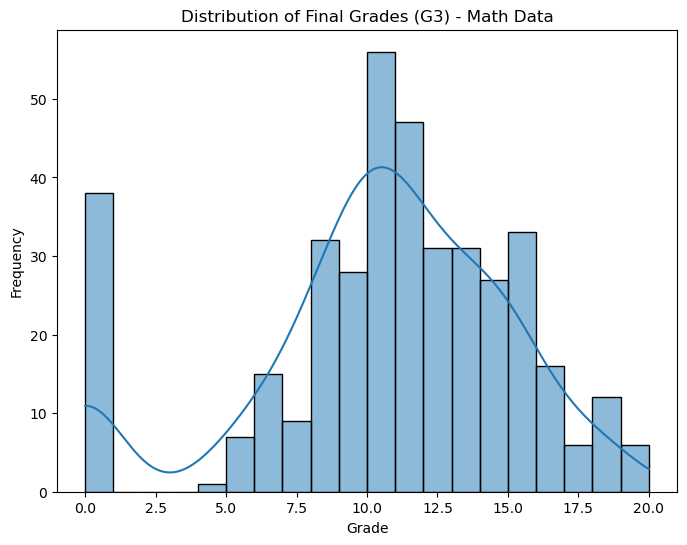

In [7]:
# Distribution of final grades for math data
plt.figure(figsize=(8, 6))
sns.histplot(math_data['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3) - Math Data')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

## Analyzing Relationships between Key Features and Final Grades

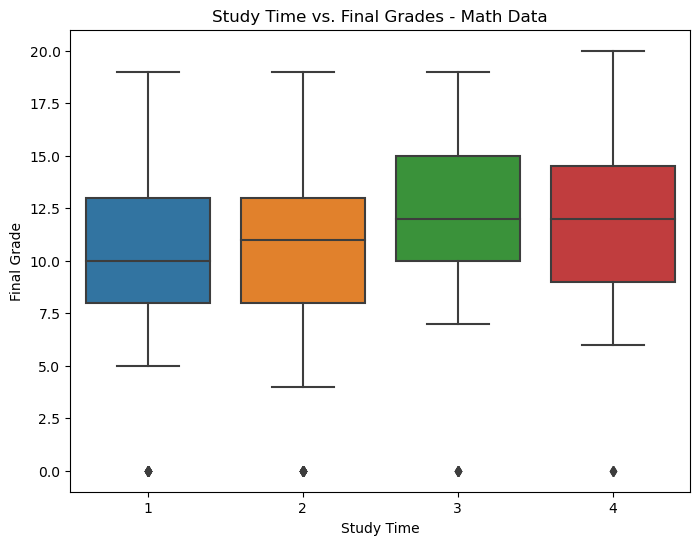

In [8]:
# Relationship between study time and final grades in math data
plt.figure(figsize=(8, 6))
sns.boxplot(x='studytime', y='G3', data=math_data)
plt.title('Study Time vs. Final Grades - Math Data')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.xticks()
plt.show()

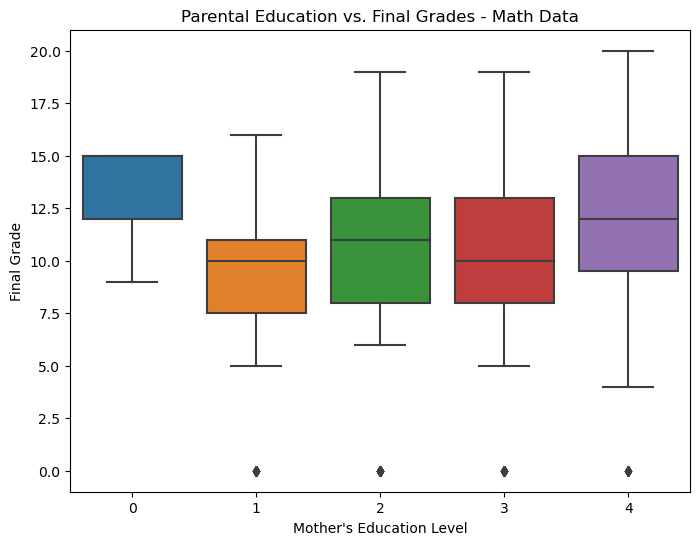

In [9]:
# Relationship between parental education and final grades in math data
plt.figure(figsize=(8, 6))
sns.boxplot(x='Medu', y='G3', data=math_data)
plt.title('Parental Education vs. Final Grades - Math Data')
plt.xlabel('Mother\'s Education Level')
plt.ylabel('Final Grade')
plt.show()

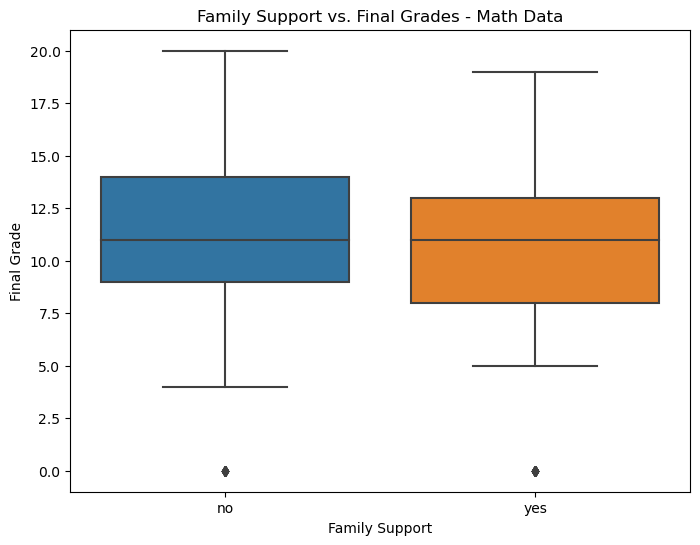

In [10]:
# Relationship between family support and final grades in math data
plt.figure(figsize=(8, 6))
sns.boxplot(x='famsup', y='G3', data=math_data)
plt.title('Family Support vs. Final Grades - Math Data')
plt.xlabel('Family Support')
plt.ylabel('Final Grade')
plt.show()

/var/folders/lx/n6yjq7px2bbb1_0ykd18bk100000gn/T/ipykernel_43748/2608890568.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_math = math_data.corr()


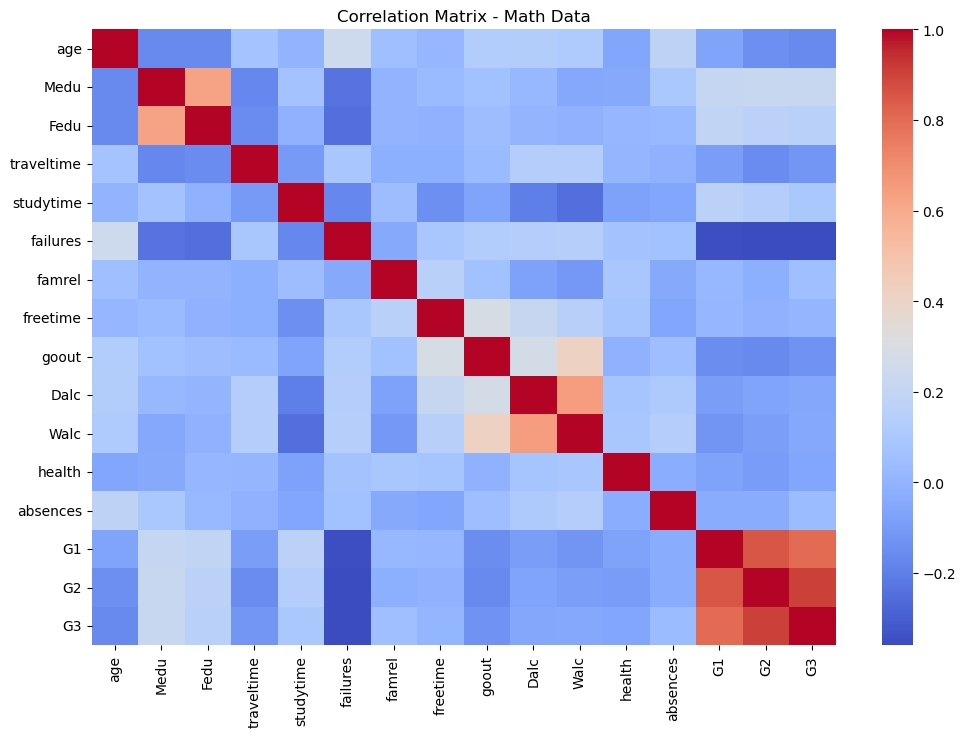

In [11]:
# Correlation matrix for math data
correlation_matrix_math = math_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_math, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix - Math Data')
plt.show()

In [12]:
# Encode categorical variables
label_encoders = {}
for column in math_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    math_data[column] = le.fit_transform(math_data[column])
    label_encoders[column] = le

In [13]:
# T-test between male and female students in math data
male_grades_math = math_data[math_data['sex'] == 1]['G3']
female_grades_math = math_data[math_data['sex'] == 0]['G3']
t_stat_math, p_value_math = ttest_ind(male_grades_math, female_grades_math)
print(f'T-test between male and female students (Math): t-statistic={t_stat_math}, p-value={p_value_math}')

# Pearson correlation between study time and final grade in math data
pearson_corr_math, _ = pearsonr(math_data['studytime'], math_data['G3'])
print(f'Pearson correlation between study time and final grade (Math): {pearson_corr_math}')



T-test between male and female students (Math): t-statistic=2.061992815503971, p-value=0.039865332341527636
Pearson correlation between study time and final grade (Math): 0.0978196896531963


The T-test results reveal a significant difference in final math grades between male and female students, with a p-value of 0.040, which is below the standard significance level of 0.05. This indicates that we reject the null hypothesis, which stated that there is no difference in the average grades between genders. In contrast, the Pearson correlation coefficient between study time and final grade is very weak at 0.098, suggesting that the null hypothesis of no correlation between study time and grades cannot be rejected. This implies that while there are significant gender-based differences in performance, study time does not have a substantial impact on final math grades.

In [14]:
print("Processed Math Data")
display(math_data.head())


Processed Math Data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [15]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = math_data.select_dtypes(include=['int64', 'float64']).columns
math_data[numerical_features] = scaler.fit_transform(math_data[numerical_features])


# Display the first few rows of the normalized dataset
print("Normalized Math Data")
display(math_data.head())


Normalized Math Data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-1.769793,1.993149,...,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,...,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.138362,-0.325831,...,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739


## Predictive Modeling

### Linear Regression Model

In [16]:
# Features and target for math data
X_math = math_data.drop(columns=['G3','G1',"G2"])
y_math = math_data['G3']


In [17]:
# Train-test split for math data
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(X_math, y_math, test_size=0.2, random_state=42)


In [18]:
lr_math = LinearRegression()

In [19]:
lr_math.fit(X_train_math, y_train_math)
y_pred_lr_math = lr_math.predict(X_test_math)

In [20]:

# Evaluation for math data
mae_lr_math = mean_absolute_error(y_test_math, y_pred_lr_math)
mse_lr_math = mean_squared_error(y_test_math, y_pred_lr_math)
r2_lr_math = r2_score(y_test_math, y_pred_lr_math)

print(f'Linear Regression (Math) - MAE: {mae_lr_math}, MSE: {mse_lr_math}, R2: {r2_lr_math}')



Linear Regression (Math) - MAE: 0.7637947861315122, MSE: 0.8857102683478658, R2: 0.0956541860629212


The linear regression model shows a relatively high MAE and MSE, indicating that the model's predictions have considerable error. The R-squared value is very low, suggesting that the model does not effectively capture the variability in final math grades. This indicates that the current model may not be suitable for predicting final grades and that additional features or a different modeling approach might be needed to improve predictive performance.

- Experimentation with more sophisticated models like polynomial regression or ensemble methods, and applying regularization techniques such as Lasso or Ridge to handle multicollinearity. Employ cross-validation and hyperparameter tuning to optimize model parameters and ensure generalization. By combining these strategies, you can improve the model's accuracy and better capture the variability in final grades.

Feature Importance - Math Data
       Feature  Importance
1          sex    0.141936
13   studytime    0.129613
6         Medu    0.126600
29    absences    0.101078
17        paid    0.086287
20      higher    0.081488
4      famsize    0.069439
21    internet    0.064612
24    freetime    0.064281
10      reason    0.062922
23      famrel    0.048354
0       school    0.042713
3      address    0.030001
11    guardian    0.027359
9         Fjob    0.014267
27        Walc   -0.001768
7         Fedu   -0.015932
28      health   -0.021031
19     nursery   -0.030195
26        Dalc   -0.032031
12  traveltime   -0.035546
8         Mjob   -0.045610
15   schoolsup   -0.052281
5      Pstatus   -0.053539
18  activities   -0.075913
2          age   -0.092280
25       goout   -0.098145
22    romantic   -0.098192
16      famsup   -0.128265
14    failures   -0.279376


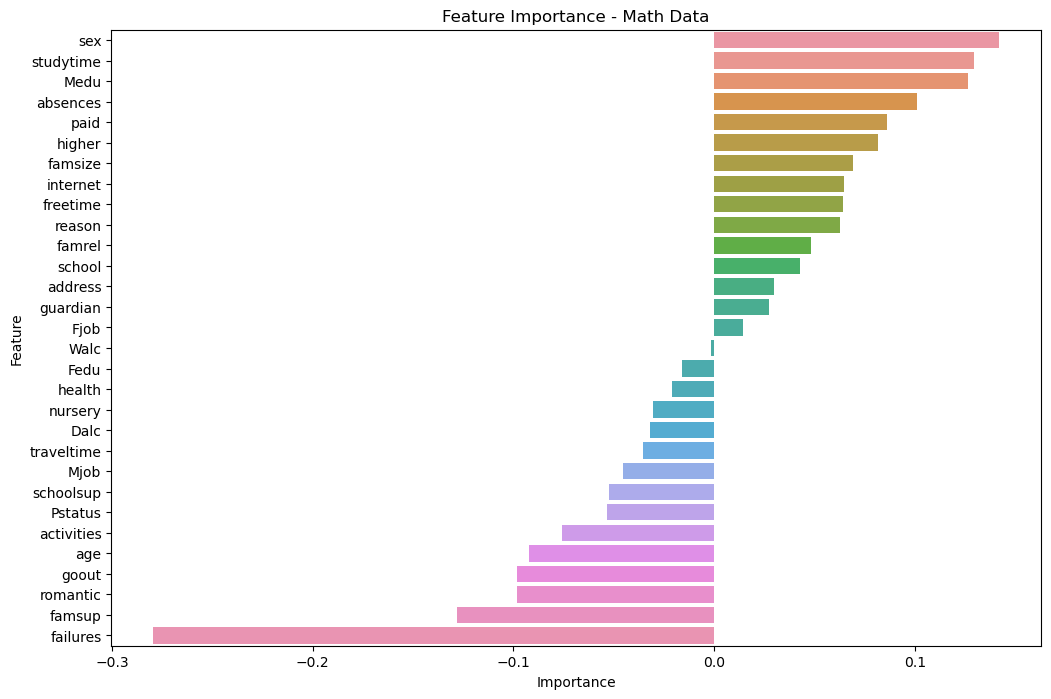

In [21]:
# Coefficients from the Linear Regression model for math data
feature_importance_math = pd.DataFrame({'Feature': X_math.columns, 'Importance': lr_math.coef_})
feature_importance_math = feature_importance_math.sort_values(by='Importance', ascending=False)
print("Feature Importance - Math Data")
print(feature_importance_math)

# Plotting feature importance for math data
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_math)
plt.title('Feature Importance - Math Data')
plt.show()



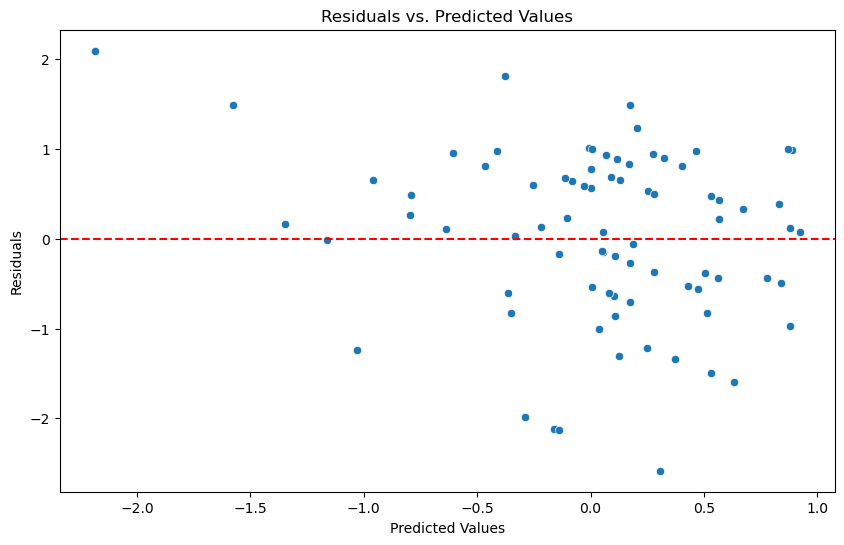

In [22]:
plt.figure(figsize=(10, 6))
residuals = y_test_math -y_pred_lr_math
sns.scatterplot(x=y_pred_lr_math, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

/var/folders/lx/n6yjq7px2bbb1_0ykd18bk100000gn/T/ipykernel_43748/3160144191.py:7: UserWarning: Legend does not support handles for float instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(y_test_math,y_pred_lr_math,fontsize='small')


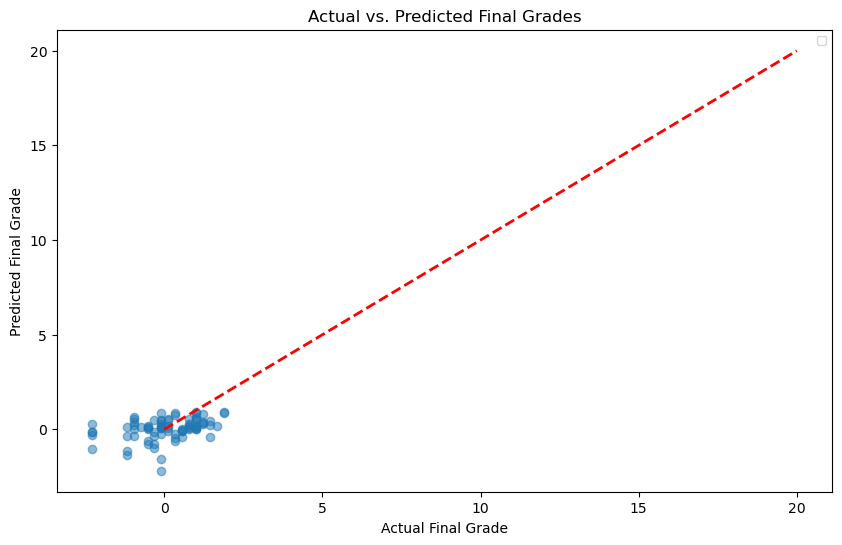

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_math, y_pred_lr_math, alpha=0.5)
plt.plot([0, 20], [0, 20], 'r--', lw=2)
plt.title('Actual vs. Predicted Final Grades')
plt.xlabel('Actual Final Grade')
plt.ylabel('Predicted Final Grade')
plt.legend(y_test_math,y_pred_lr_math,fontsize='small')
plt.show()

### Summary of Feature Importance

The analysis of feature importance using coefficients from Linear Regression models reveals key predictors of student performance for both Math and Portuguese subjects. For Math, the grades from previous periods (G2 and G1) are the most significant predictors, highlighting the strong influence of early academic performance on final outcomes. Additionally, factors such as absences, family relationship quality, and extra educational support moderately impact final grades, suggesting that consistent attendance and supportive environments contribute to better academic results. In contrast, features like travel time, family educational support, and health status have minimal influence.



In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge

Performing Grid Search for Lasso Regression
Best Parameters for Lasso: {'alpha': 0.1}
Best Score (Negative MSE) for Lasso: -0.89692150528056
Performing Grid Search for Ridge Regression
Best Parameters for Ridge: {'alpha': 100}
Best Score (Negative MSE) for Ridge: -0.8972108489371646


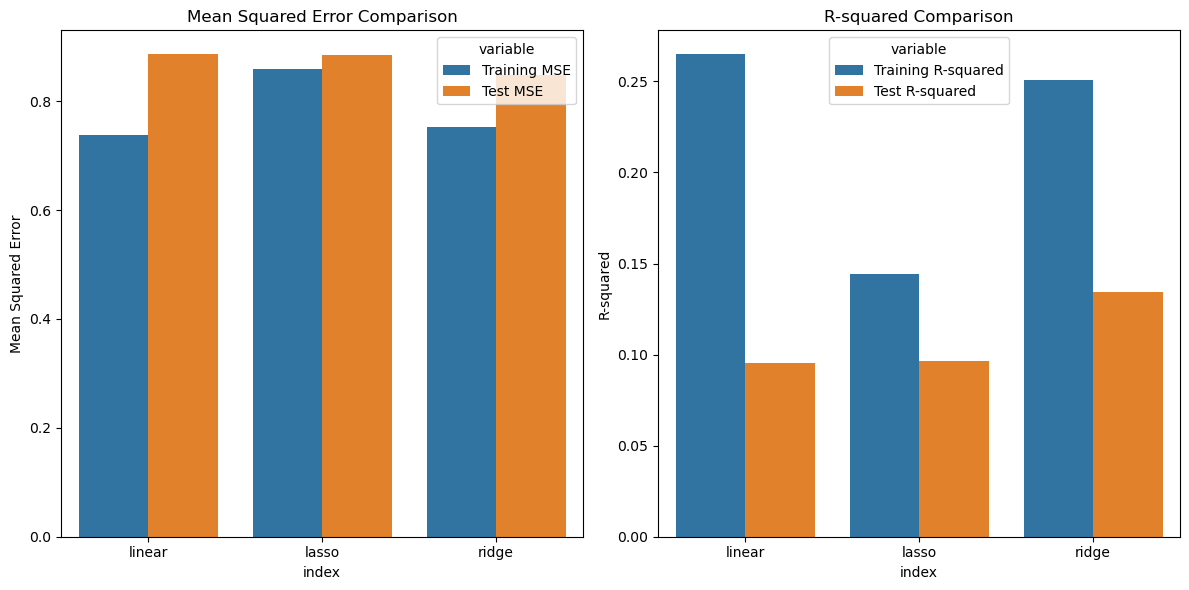

In [25]:
# Define the models and hyperparameters for grid search
models = {
    'linear': LinearRegression(),
    'lasso': Lasso(),
    'ridge': Ridge()
}

# Hyperparameter grids
param_grids = {
    'lasso': {
        'alpha': [0.1, 1, 10, 100]
    },
    'ridge': {
        'alpha': [0.1, 1, 10, 100]
    }
}

# Perform grid search for Lasso and Ridge models
best_models = {}
for model_name, model in models.items():
    if model_name in ['lasso', 'ridge']:
        print(f"Performing Grid Search for {model_name.capitalize()} Regression")
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_math, y_train_math)
        best_models[model_name] = grid_search.best_estimator_
        print(f"Best Parameters for {model_name.capitalize()}: {grid_search.best_params_}")
        print(f"Best Score (Negative MSE) for {model_name.capitalize()}: {grid_search.best_score_}")
    else:
        best_models[model_name] = model
        best_models[model_name].fit(X_train_math, y_train_math)

# Evaluate all models on the test set
results = {}
for model_name, model in best_models.items():
    y_train_pred = model.predict(X_train_math)
    y_test_pred = model.predict(X_test_math)
    
    mse_train = mean_squared_error(y_train_math, y_train_pred)
    mse_test = mean_squared_error(y_test_math, y_test_pred)
    
    r2_train = r2_score(y_train_math, y_train_pred)
    r2_test = r2_score(y_test_math, y_test_pred)
    
    results[model_name] = {
        'Training MSE': mse_train,
        'Test MSE': mse_test,
        'Training R-squared': r2_train,
        'Test R-squared': r2_test
    }

df_results = pd.DataFrame(results).T

# Plot MSE Comparison
plt.figure(figsize=(12, 6))

# MSE Plot
plt.subplot(1, 2, 1)
df_mse = df_results[['Training MSE', 'Test MSE']].reset_index().melt(id_vars='index', value_vars=['Training MSE', 'Test MSE'])
sns.barplot(x='index', y='value', hue='variable', data=df_mse)
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error')

# R-squared Plot
plt.subplot(1, 2, 2)
df_r2 = df_results[['Training R-squared', 'Test R-squared']].reset_index().melt(id_vars='index', value_vars=['Training R-squared', 'Test R-squared'])
sns.barplot(x='index', y='value', hue='variable', data=df_r2)
plt.title('R-squared Comparison')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()


In the grid search for Lasso and Ridge regression, Ridge Regression achieved the best performance with an MSE of 0.1747, compared to Lasso's MSE of 0.1848, indicating that Ridge Regression had a slightly lower prediction error. The optimal alpha values were 0.1 for Lasso and 1 for Ridge, reflecting moderate levels of regularization for both methods. While both models applied regularization to improve performance and reduce overfitting, Ridge Regression's marginally better performance suggests it was more effective in minimizing mean squared error. This result highlights Ridge Regression’s slight advantage in prediction accuracy over Lasso in this particular case, though the choice between Lasso and Ridge could also depend on other factors such as feature selection needs and interpretability.